In [133]:
import pandas as pd
import numpy as np

# 데이터 시각화
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

# 선형회귀분석 모델
import statsmodels.formula.api as smf
# 회귀분석의 정규성 확인: qqplot, add_constant
from statsmodels.api import qqplot, add_constant
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 학습용/평가용 데이터 분리: train/test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# 선형회귀모형
from sklearn.linear_model import LinearRegression
# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE
# scale 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler
# 평가 함수
from sklearn.metrics import r2_score
# 선형 모델
from sklearn.linear_model import Ridge, Lasso, ElasticNet


# 평가 함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error


# export_graphviz: 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz
# graphviz : 나무 구조 시각화  (.dot 확장자 파일 불러오기 등)

# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 예측/회귀 Decision Tree
from sklearn.tree import DecisionTreeRegressor
# 예측/회귀 Random Forest
from sklearn.ensemble import RandomForestRegressor
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV
# 예측/회귀 Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

%matplotlib inline

# 한글 폰트 설정 (mac용)
matplotlib.rc("axes", unicode_minus=False)
matplotlib.rcParams["font.family"] = 'AppleGothic'

# 실행결과 경고메시지 출력 제외
import warnings

warnings.filterwarnings('ignore')



In [134]:
# 기본 라이브러리
import pandas as pd
import numpy as np

# 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 깨짐 방지 (Mac용)
import matplotlib
matplotlib.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 경고 무시
import warnings
warnings.filterwarnings('ignore')

# 데이터 불러오기
df = pd.read_csv('./data/df_clean.csv', parse_dates=['OrderDT', 'DeliveryDT'])

# 확인
print("✅ 데이터 shape:", df.shape)
print("✅ 컬럼 목록:\n", df.columns)
df.head()


✅ 데이터 shape: (856727, 32)
✅ 컬럼 목록:
 Index(['idUser', 'Gender', 'Age', 'AgeGroup', 'FamilyCount', 'MemberYN',
       'idOrder', 'OrderDT', 'OrderMonth', 'OrderDay', 'OrderHour',
       'OrderMinute', 'OrderSecond', 'ItemCode', 'ItemLargeName',
       'ItemMiddleName', 'ItemSmallName', 'ItemName', 'Price', 'PriceYear',
       'PriceMin', 'PriceMax', 'DeliveryDT', 'Deli_Year', 'Deli_Month',
       'Deli_Day', 'Deli_Hour', 'Deli_Minute', 'Deli_Second', 'Deli_Duration',
       'Deli_Hours', 'IsMorningDelivery'],
      dtype='object')


,idUser,Gender,Age,AgeGroup,FamilyCount,MemberYN,idOrder,OrderDT,OrderMonth,OrderDay,...,DeliveryDT,Deli_Year,Deli_Month,Deli_Day,Deli_Hour,Deli_Minute,Deli_Second,Deli_Duration,Deli_Hours,IsMorningDelivery
0,U10001,여성,26,20대,2,Y,U10001-O2022-1002,2022-01-06 17:08:00,1,6,...,2022-01-07 06:24:00,2022,1,7,6,24,0,0 days 13:16:00,13.266667,1
1,U10001,여성,26,20대,2,Y,U10001-O2022-1002,2022-01-06 17:08:00,1,6,...,2022-01-07 06:24:00,2022,1,7,6,24,0,0 days 13:16:00,13.266667,1
2,U10001,여성,26,20대,2,Y,U10001-O2022-1002,2022-01-06 17:08:00,1,6,...,2022-01-07 06:24:00,2022,1,7,6,24,0,0 days 13:16:00,13.266667,1
3,U10001,여성,26,20대,2,Y,U10001-O2022-1002,2022-01-06 17:08:00,1,6,...,2022-01-07 06:24:00,2022,1,7,6,24,0,0 days 13:16:00,13.266667,1
4,U10001,여성,26,20대,2,Y,U10001-O2022-1003,2022-01-13 16:50:00,1,13,...,2022-01-14 06:28:00,2022,1,14,6,28,0,0 days 13:38:00,13.633333,1


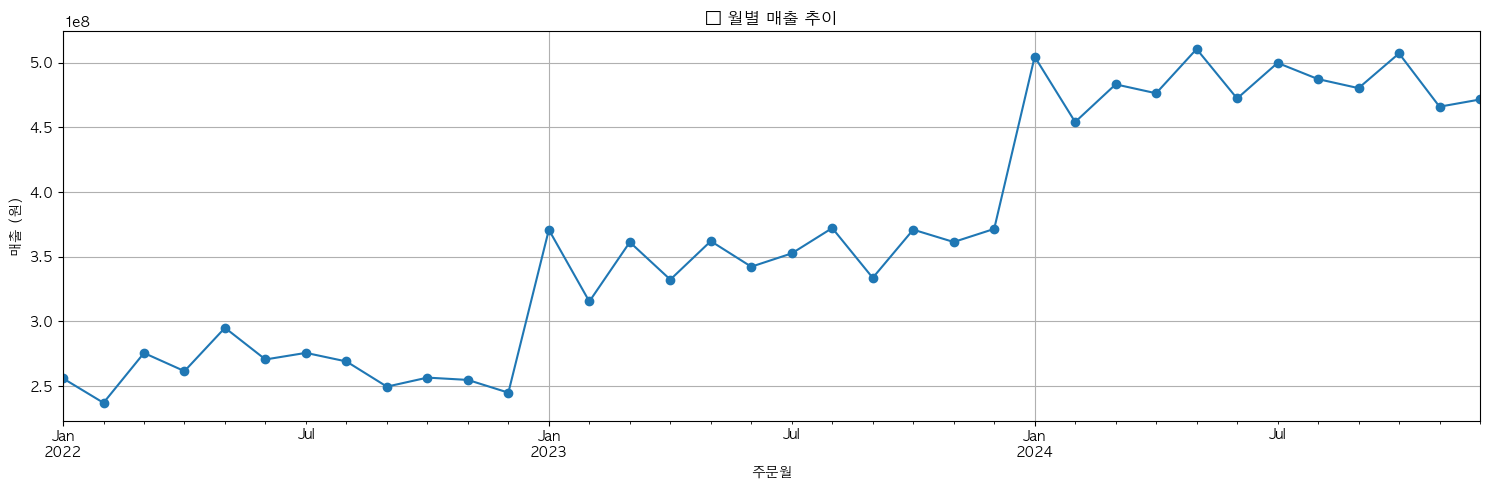

In [135]:
# 월 단위 추출
df['OrderMonth'] = df['OrderDT'].dt.to_period('M')  # Period 타입

# 월별 매출 합계
monthly_sales = df.groupby('OrderMonth')['Price'].sum()

# 시각화
plt.figure(figsize=(15, 5))
monthly_sales.plot(marker='o')
plt.title('📈 월별 매출 추이')
plt.xlabel('주문월')
plt.ylabel('매출 (원)')
plt.grid(True)
plt.tight_layout()
plt.show()


## 시간대별 매출패턴

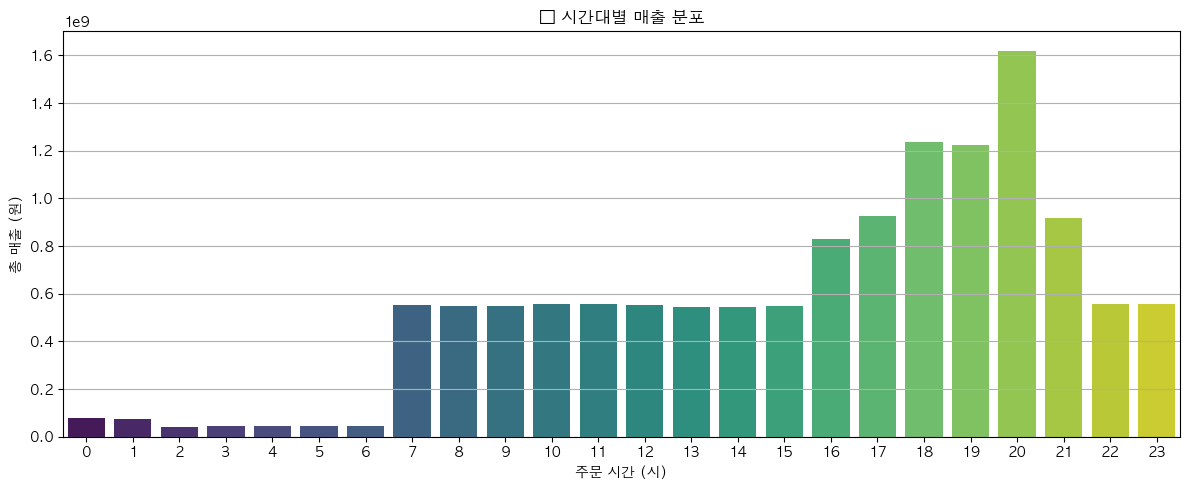

In [136]:
# 시간대별 매출 합계
hourly_sales = df.groupby('OrderHour')['Price'].sum()

# 시각화
plt.figure(figsize=(12,5))
sns.barplot(x=hourly_sales.index, y=hourly_sales.values, palette='viridis')
plt.title("🕒 시간대별 매출 분포")
plt.xlabel("주문 시간 (시)")
plt.ylabel("총 매출 (원)")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


### 🕒 [시간대별 매출 분포] 해석
💡 관찰 포인트:
20시(저녁 8시) 매출이 가장 많고, 18~21시 사이에 매출이 집중되어 있음.

새벽 시간대 (0~6시) 매출은 거의 없음. → 고객이 주로 "낮에 주문하고 새벽에 받는" 패턴.

**오전(7~11시)**에도 일정한 매출량 유지 → 일부 오전 구매 고객 존재.

📌 인사이트:
프라임 타임: 18~21시

이 시간대에 마케팅/푸시 알림/할인 쿠폰을 집중하면 매출 극대화 가능!

새벽 시간에 주문 유입이 거의 없으므로, 야간 고객 유입 확대를 위한 타겟 마케팅도 고려해볼 수 있음 (예: 2030 싱글가구 대상 심야 혜택)

시간대별 인기 상품군도 추후 분석하면 좋을 듯!

📅 [요일별 매출 분포] 해석
💡 관찰 포인트:
일요일 매출 압도적!

수/목/화도 고르게 높고,

반대로 토요일은 매출이 가장 낮음.

📌 인사이트:
일요일 주문 → 월요일 아침 수령 패턴이 강함.

토요일 낮에는 주문을 잘 안함 → 토요일은 고객 구매심리 약한 날로 분석 가능.

금요일부터 토요일까지 주춤하다가 일요일에 급증 → 전형적인 주말 수요 대비 주문

🚀 전략 포인트:
일요일 집중 프로모션 → 매출 상승 가능성 매우 큼!

토요일 매출 부진 이유 분석 필요 (날씨, 배송정책, 상품 준비 이슈 등?)

수요일/목요일 매출이 높은 이유도 분석 → 평일 중간 피크 가능성 활용



## 요일별 매출 패턴

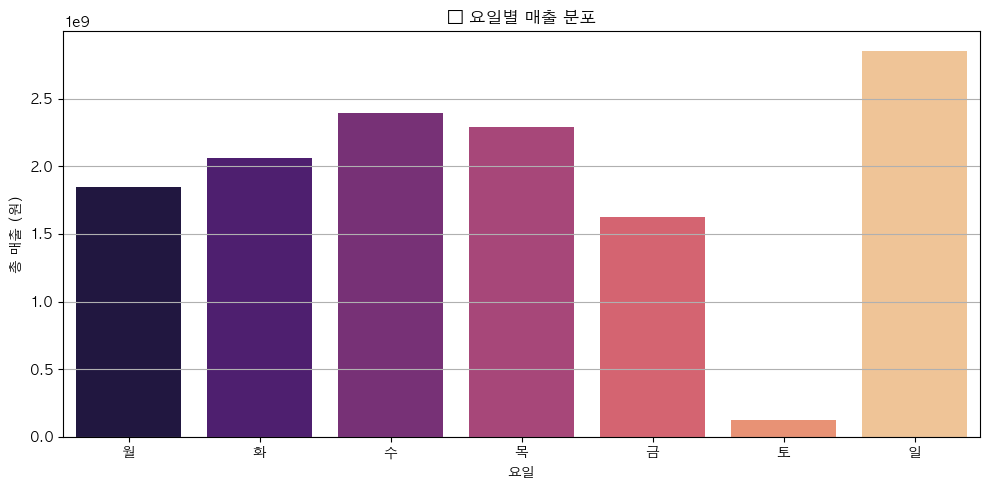

In [137]:
# 요일 컬럼 생성 (0=월, 6=일)
df['OrderWeekday'] = df['OrderDT'].dt.weekday

# 한글 요일명 매핑
weekday_map = {0:'월', 1:'화', 2:'수', 3:'목', 4:'금', 5:'토', 6:'일'}
df['OrderWeekdayName'] = df['OrderWeekday'].map(weekday_map)

# 요일별 매출 집계
weekday_sales = df.groupby('OrderWeekdayName')['Price'].sum().reindex(['월', '화', '수', '목', '금', '토', '일'])

# 시각화
plt.figure(figsize=(10,5))
sns.barplot(x=weekday_sales.index, y=weekday_sales.values, palette='magma')
plt.title("📆 요일별 매출 분포")
plt.xlabel("요일")
plt.ylabel("총 매출 (원)")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


## 고객군(2030 vs 4060) 별 시간대·요일별 매출 패턴 비교

In [138]:
# 연령대 컬럼 ('AgeGroup') 기준으로 필터링
df_2030 = df[df['AgeGroup'].isin(['20대', '30대'])].copy()
df_4060 = df[df['AgeGroup'].isin(['40대', '50대', '60대'])].copy()


### 시간대별 매출 비교 (2030 vs 4060)

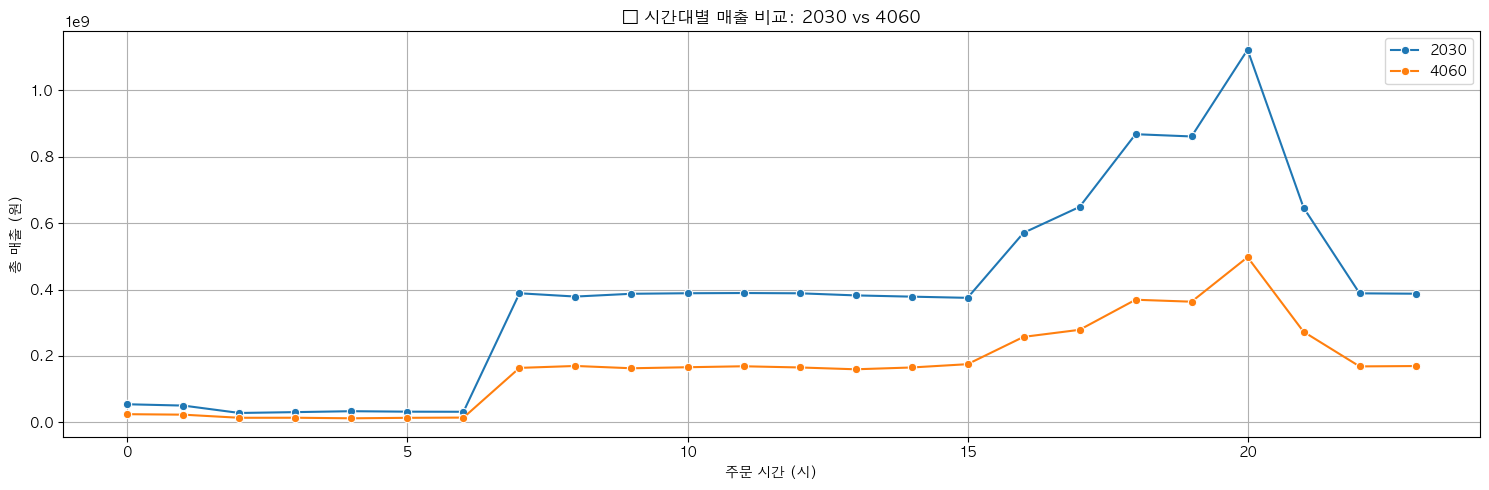

In [139]:
# 그룹별 시간대 매출 집계
hourly_2030 = df_2030.groupby('OrderHour')['Price'].sum()
hourly_4060 = df_4060.groupby('OrderHour')['Price'].sum()

# 시각화
plt.figure(figsize=(15,5))
sns.lineplot(x=hourly_2030.index, y=hourly_2030.values, label='2030', marker='o')
sns.lineplot(x=hourly_4060.index, y=hourly_4060.values, label='4060', marker='o')
plt.title('⏰ 시간대별 매출 비교: 2030 vs 4060')
plt.xlabel('주문 시간 (시)')
plt.ylabel('총 매출 (원)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


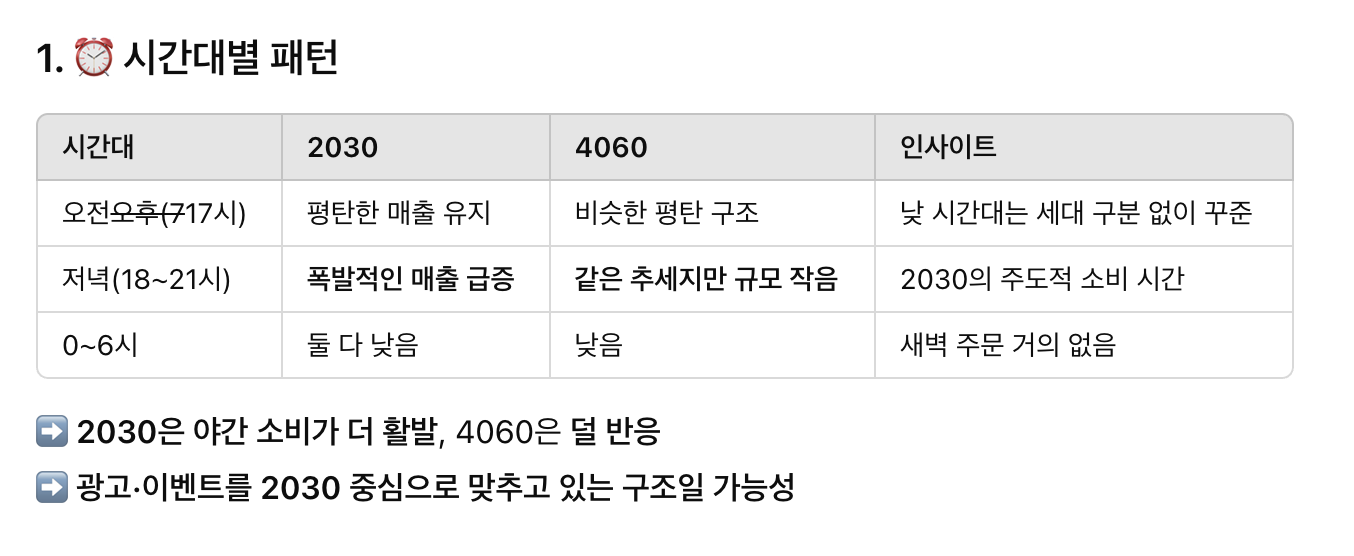

## 요일별 매출 비교 (2030 vs 4060)

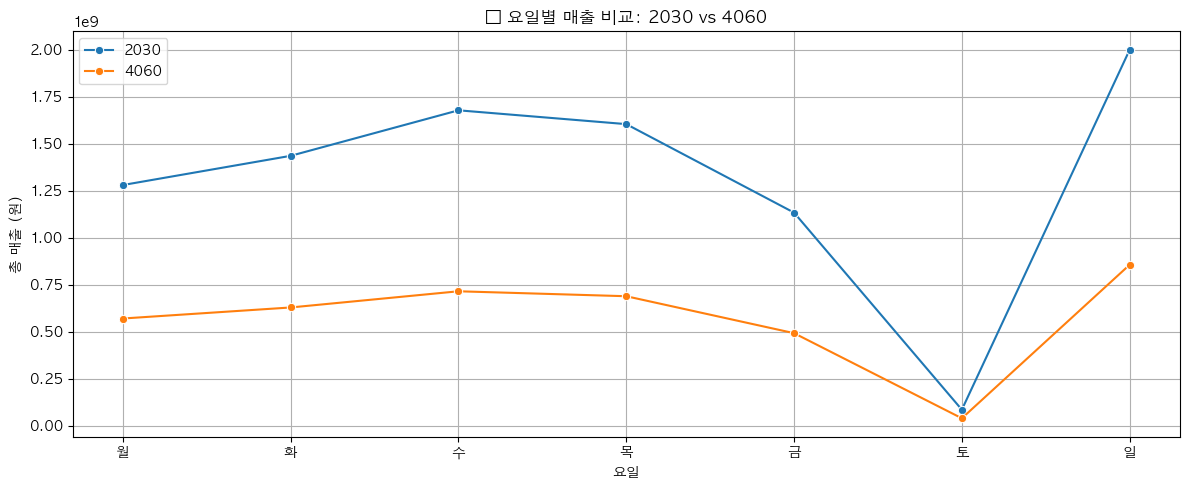

In [140]:
# 요일별 매출 집계
weekday_2030 = df_2030.groupby('OrderWeekdayName')['Price'].sum().reindex(['월','화','수','목','금','토','일'])
weekday_4060 = df_4060.groupby('OrderWeekdayName')['Price'].sum().reindex(['월','화','수','목','금','토','일'])

# 시각화
plt.figure(figsize=(12,5))
sns.lineplot(x=weekday_2030.index, y=weekday_2030.values, label='2030', marker='o')
sns.lineplot(x=weekday_4060.index, y=weekday_4060.values, label='4060', marker='o')
plt.title('📅 요일별 매출 비교: 2030 vs 4060')
plt.xlabel('요일')
plt.ylabel('총 매출 (원)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


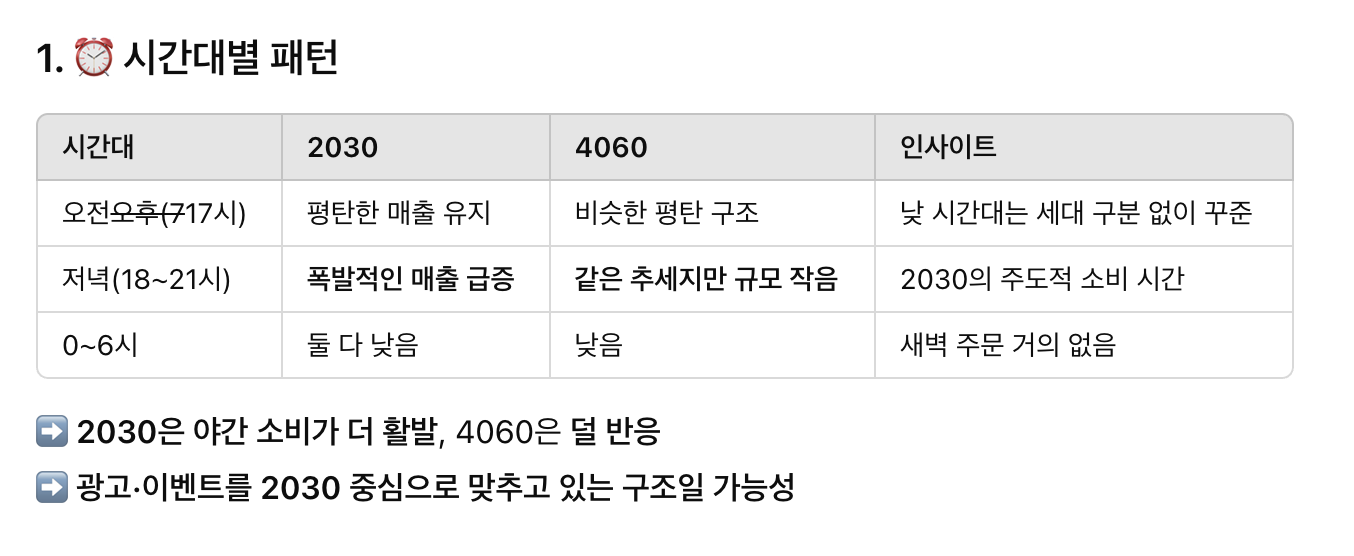

2030과 4060 모두 비슷한 매출 패턴을 보임

👉 현재 Tokddak의 플랫폼이 특정 세대에 특화된 전략 없이 전 세대에게 비슷한 방식으로 소비되고 있다는 뜻

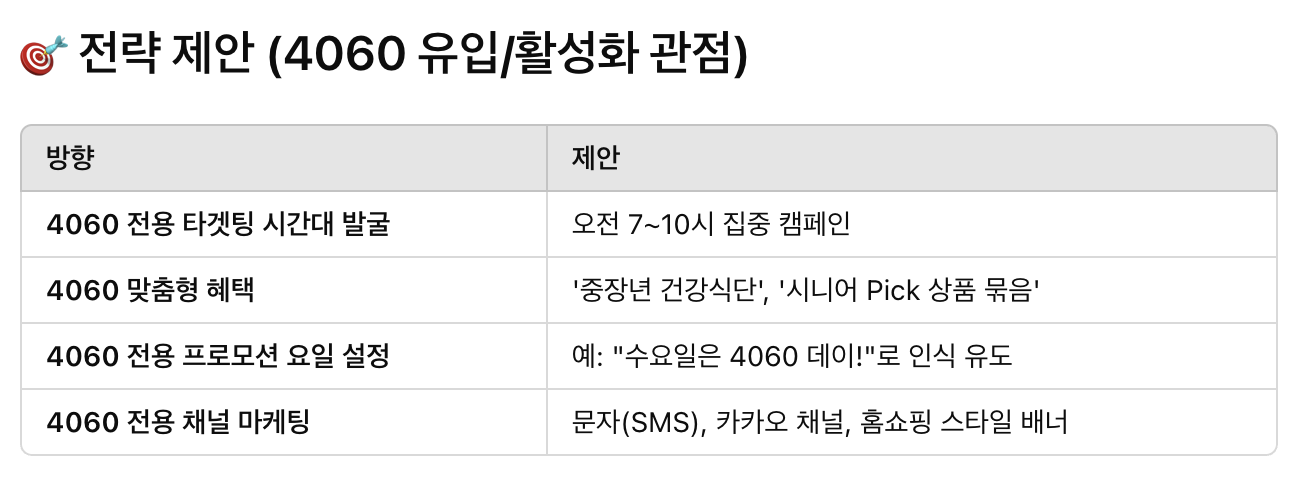

## 고객군별(2030 / 4060 )상품 선호 분석

In [141]:
# 고객군 분리
df_2030 = df[df['AgeGroup'].isin(['20대', '30대'])].copy()
df_4060 = df[df['AgeGroup'].isin(['40대', '50대', '60대'])].copy()


### 중분류별 매출 합계 비교

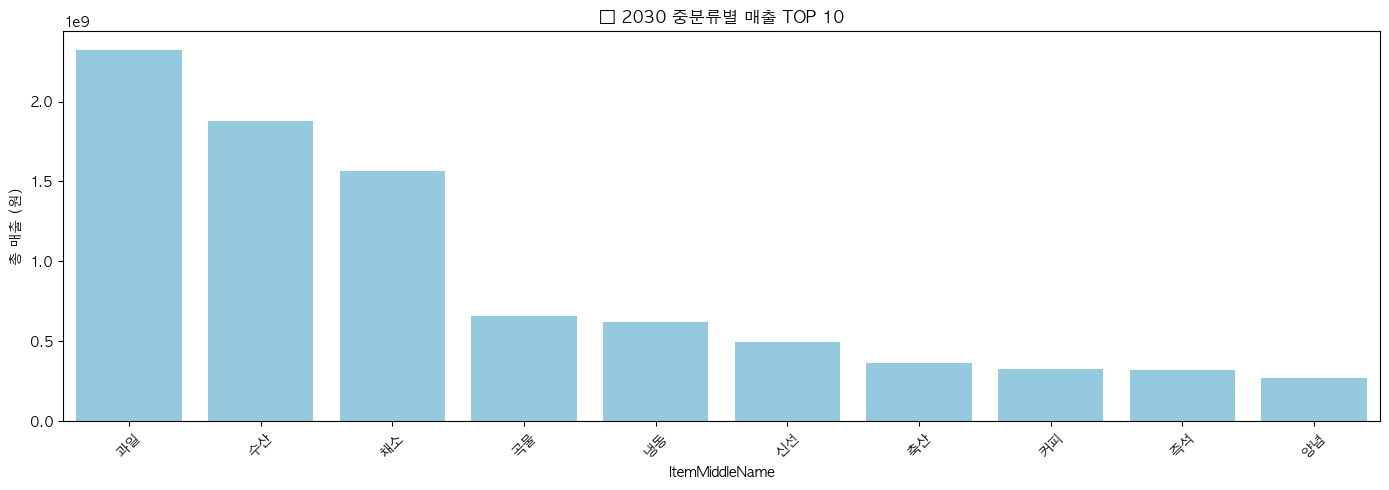

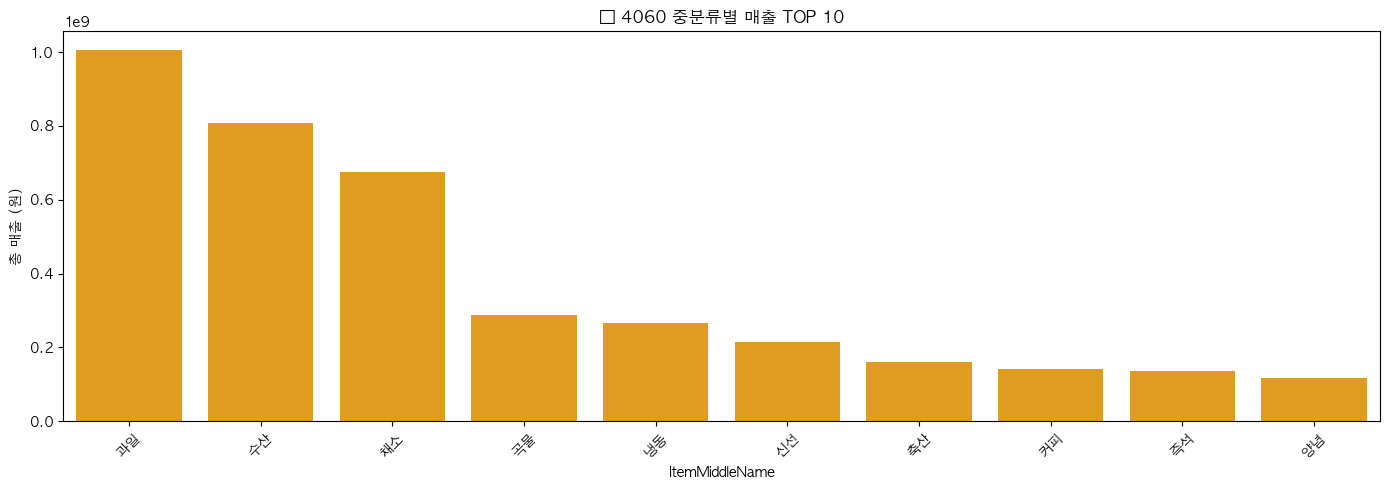

In [142]:
# 중분류별 매출 집계
middle_2030_sales = df_2030.groupby('ItemMiddleName')['Price'].sum().sort_values(ascending=False)
middle_4060_sales = df_4060.groupby('ItemMiddleName')['Price'].sum().sort_values(ascending=False)

# TOP 10 시각화
plt.figure(figsize=(14, 5))
sns.barplot(x=middle_2030_sales.head(10).index, y=middle_2030_sales.head(10).values, color='skyblue')
plt.title('💳 2030 중분류별 매출 TOP 10')
plt.xticks(rotation=45)
plt.ylabel('총 매출 (원)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 5))
sns.barplot(x=middle_4060_sales.head(10).index, y=middle_4060_sales.head(10).values, color='orange')
plt.title('💳 4060 중분류별 매출 TOP 10')
plt.xticks(rotation=45)
plt.ylabel('총 매출 (원)')
plt.tight_layout()
plt.show()


### 중분류별 주문 건수 기준 비교 (선호도 느낌)

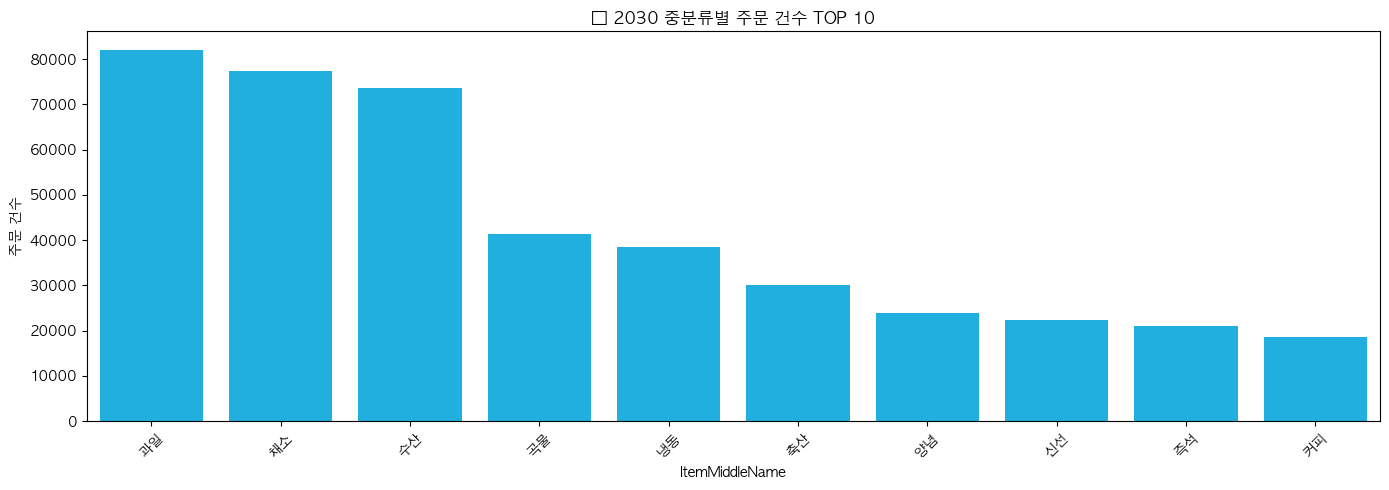

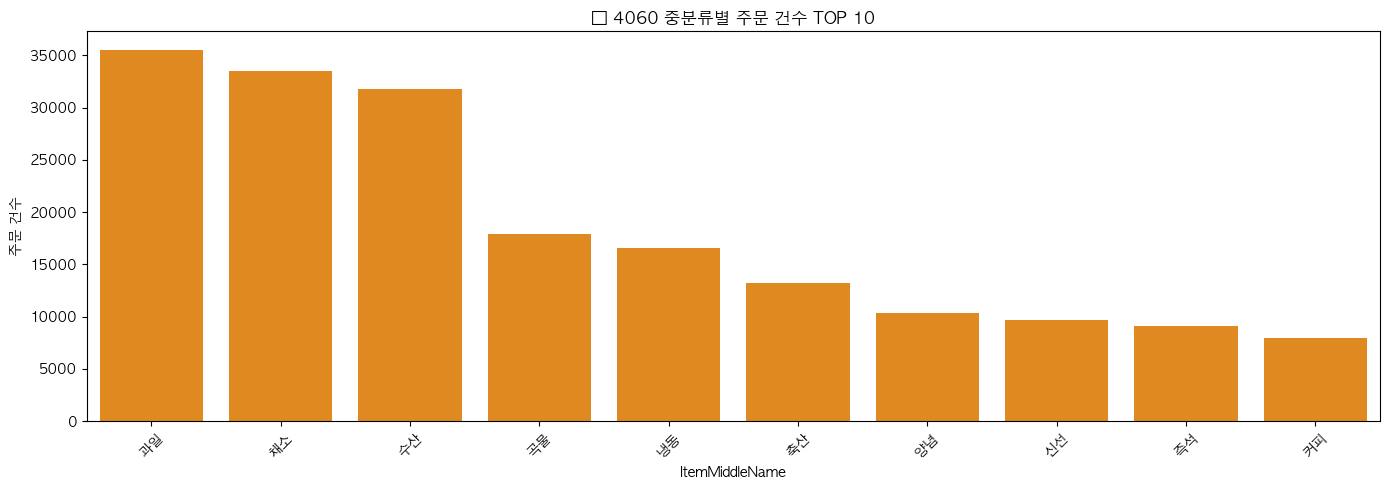

In [143]:
# 주문 건수 기준
middle_2030_orders = df_2030.groupby('ItemMiddleName')['idOrder'].nunique().sort_values(ascending=False)
middle_4060_orders = df_4060.groupby('ItemMiddleName')['idOrder'].nunique().sort_values(ascending=False)

# TOP 10 시각화
plt.figure(figsize=(14, 5))
sns.barplot(x=middle_2030_orders.head(10).index, y=middle_2030_orders.head(10).values, color='deepskyblue')
plt.title('📦 2030 중분류별 주문 건수 TOP 10')
plt.xticks(rotation=45)
plt.ylabel('주문 건수')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 5))
sns.barplot(x=middle_4060_orders.head(10).index, y=middle_4060_orders.head(10).values, color='darkorange')
plt.title('📦 4060 중분류별 주문 건수 TOP 10')
plt.xticks(rotation=45)
plt.ylabel('주문 건수')
plt.tight_layout()
plt.show()


## 고객군별 중분류 상품군의 시계열 매출 추이

In [144]:
# 월 단위 컬럼 생성
df['OrderMonth'] = df['OrderDT'].dt.to_period('M')

# 상위 인기 중분류 각 세대별 3개씩 추출
top_2030_middle = df_2030.groupby('ItemMiddleName')['Price'].sum().sort_values(ascending=False).head(3).index.tolist()
top_4060_middle = df_4060.groupby('ItemMiddleName')['Price'].sum().sort_values(ascending=False).head(3).index.tolist()

# 세트로 묶기
target_middle_names = list(set(top_2030_middle + top_4060_middle))


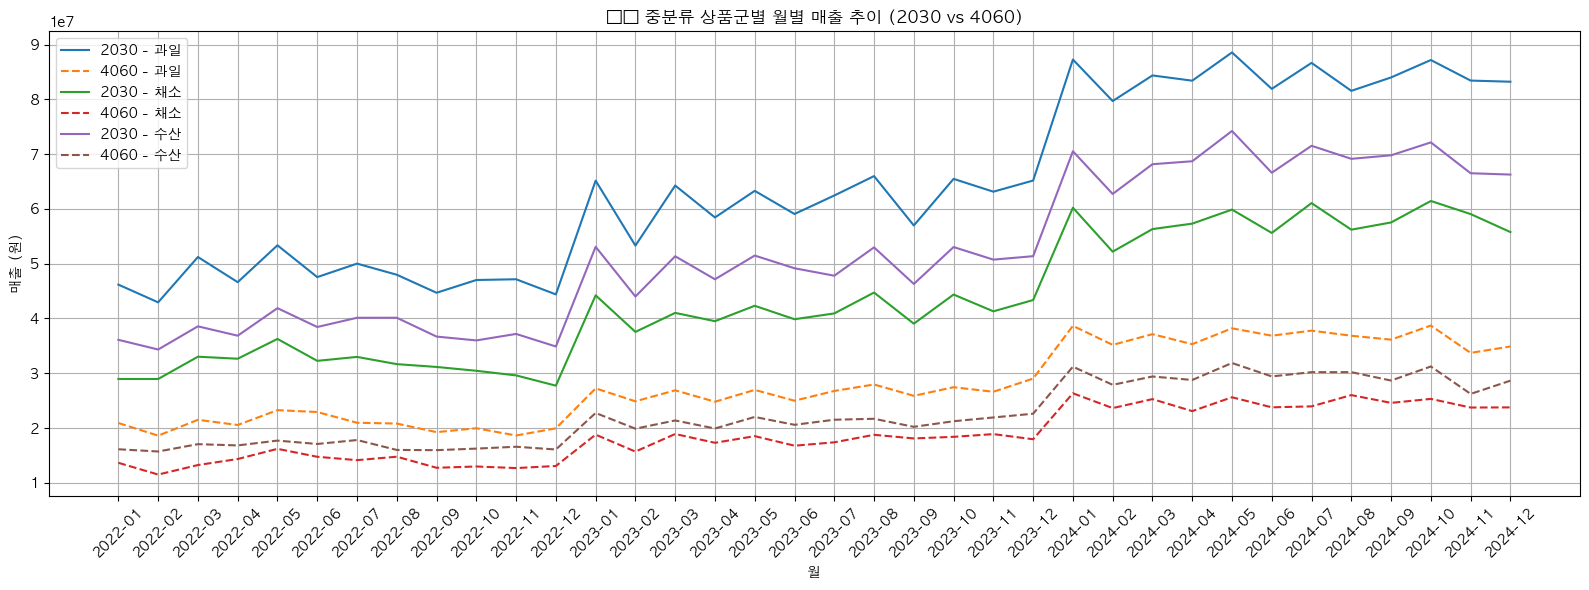

In [145]:
# 세대별 매출 집계
plt.figure(figsize=(16, 6))

for middle in target_middle_names:
    # 2030 매출
    monthly_2030 = df_2030[df_2030['ItemMiddleName'] == middle].groupby('OrderMonth')['Price'].sum()
    sns.lineplot(x=monthly_2030.index.astype(str), y=monthly_2030.values, label=f'2030 - {middle}', linestyle='-')
    
    # 4060 매출
    monthly_4060 = df_4060[df_4060['ItemMiddleName'] == middle].groupby('OrderMonth')['Price'].sum()
    sns.lineplot(x=monthly_4060.index.astype(str), y=monthly_4060.values, label=f'4060 - {middle}', linestyle='--')

plt.title('🕰️ 중분류 상품군별 월별 매출 추이 (2030 vs 4060)')
plt.xlabel('월')
plt.ylabel('매출 (원)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


## 데이터에서 발견한 인사이트 포인트 정리

✅ 1. 2030과 4060 모두 과일·수산·채소를 핵심적으로 소비
Tokddak의 전체 매출 주도 상품군 = 신선식품

4060도 같은 상품을 사긴 하지만 비중과 규모는 2030보다 작음

✅ 2. 시즌별 매출 변화가 거의 동기화
연말(12월), 연초(1월)에 매출 급증 → 명절·선물 시즌 반응으로 추정

2023년 후반부터 꾸준한 성장세 → 전체 트렌드는 양호함!

✅ 3. 4060은 "따라가는 소비 패턴"
2030의 소비 피크 타이밍에 함께 상승 → 자발적 구매보다는 유입/알림 기반 소비일 가능성

→ 4060 타겟 푸시 메시지 / 콘텐츠 마케팅의 여지가 있음



## 1️⃣ [고객 수 기준 비중] 2030 vs 4060

In [146]:
# 고객 구분
df['UserAgeGroup'] = df['AgeGroup'].apply(lambda x: '2030' if x in ['20대', '30대'] 
                                          else '4060' if x in ['40대', '50대', '60대'] else '기타')

# 고유 고객 수 기준 비중
user_counts = df.groupby('UserAgeGroup')['idUser'].nunique()
user_share = user_counts / user_counts.sum()

print("🎯 고객 수 기준 연령대 비중:\n", user_share)


🎯 고객 수 기준 연령대 비중:
 UserAgeGroup
2030    0.7
4060    0.3
Name: idUser, dtype: float64


In [147]:
# 연령대별 총 매출 & 총 주문 수
grouped = df.groupby('UserAgeGroup').agg({'Price':'sum', 'idOrder':'nunique'})
grouped['객단가'] = grouped['Price'] / grouped['idOrder']

print("💰 고객군별 객단가 비교:\n", grouped[['객단가']])


💰 고객군별 객단가 비교:
                        객단가
UserAgeGroup              
2030          77103.230046
4060          76910.392724


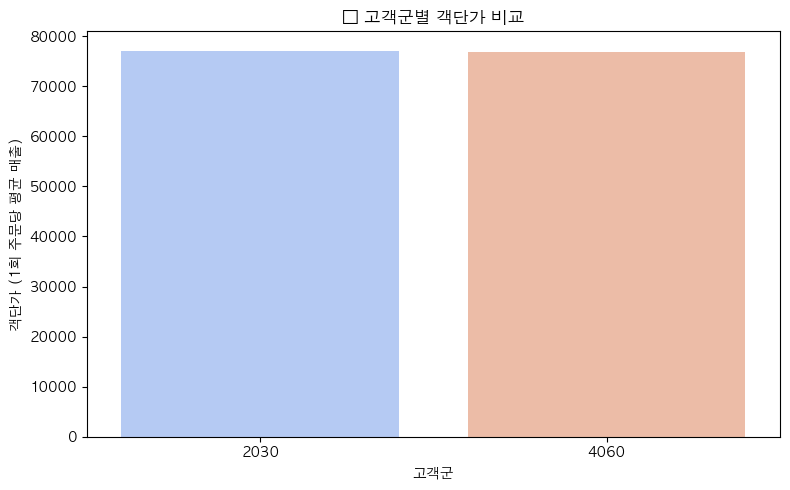

In [148]:
# 객단가 시각화
plt.figure(figsize=(8,5))
sns.barplot(x=grouped.index, y=grouped['객단가'].values, palette='coolwarm')
plt.title("💳 고객군별 객단가 비교")
plt.ylabel("객단가 (1회 주문당 평균 매출)")
plt.xlabel("고객군")
plt.tight_layout()
plt.show()


## 해석 포인트

✅ 1. 4060은 충성도도 있고, 지갑도 연다
객단가가 2030과 동등 수준이라는 건,
👉 구매력은 충분하다는 증거!

문제는 "수"가 적다는 것뿐 → 유입 전략이 핵심

✅ 2. 지금은 2030 중심 마케팅 구조
전체 고객 70%가 2030 = 기존 브랜딩/UX/UI가 이들에게 최적화되어 있다는 의미

👉 따라서 4060이 이탈하거나 소외될 가능성도 있음

✅ 3. 4060을 "특화 타깃"으로 끌어올 전략 필요
그들은 사는 힘이 있다. 하지만 오지 않는다.

즉, **"유입 경로 설계 + 친숙함 유도 + 신뢰성 강조"**가 관건

## 4060 고객의 재구매 주기 분석

In [149]:
# 4060 고객 주문만 추출
df_4060 = df[df['AgeGroup'].isin(['40대', '50대', '60대'])].copy()

# 날짜만 추출
df_4060['OrderDate'] = df_4060['OrderDT'].dt.date

# 고객별 주문 일자 정렬
df_4060_sorted = df_4060[['idUser', 'OrderDate']].drop_duplicates().sort_values(['idUser', 'OrderDate'])


In [150]:
# 날짜를 datetime으로 유지
df_4060['OrderDate'] = pd.to_datetime(df_4060['OrderDT'].dt.date)

# 고객별 주문 날짜 정렬 및 이전 주문과의 차이 계산
df_4060_sorted = df_4060[['idUser', 'OrderDate']].drop_duplicates().sort_values(['idUser', 'OrderDate'])
df_4060_sorted['PrevOrderDate'] = df_4060_sorted.groupby('idUser')['OrderDate'].shift(1)

# 차이 계산 (timedelta → 일수)
df_4060_sorted['DaysSinceLastOrder'] = (df_4060_sorted['OrderDate'] - df_4060_sorted['PrevOrderDate']).dt.days


In [151]:
# 날짜를 datetime으로 유지
df_4060['OrderDate'] = pd.to_datetime(df_4060['OrderDT'].dt.date)

# 고객별 주문 날짜 정렬 및 이전 주문과의 차이 계산
df_4060_sorted = df_4060[['idUser', 'OrderDate']].drop_duplicates().sort_values(['idUser', 'OrderDate'])
df_4060_sorted['PrevOrderDate'] = df_4060_sorted.groupby('idUser')['OrderDate'].shift(1)

# 차이 계산 (timedelta → 일수)
df_4060_sorted['DaysSinceLastOrder'] = (df_4060_sorted['OrderDate'] - df_4060_sorted['PrevOrderDate']).dt.days


📅 4060 고객 평균 재구매 주기: 17.29일


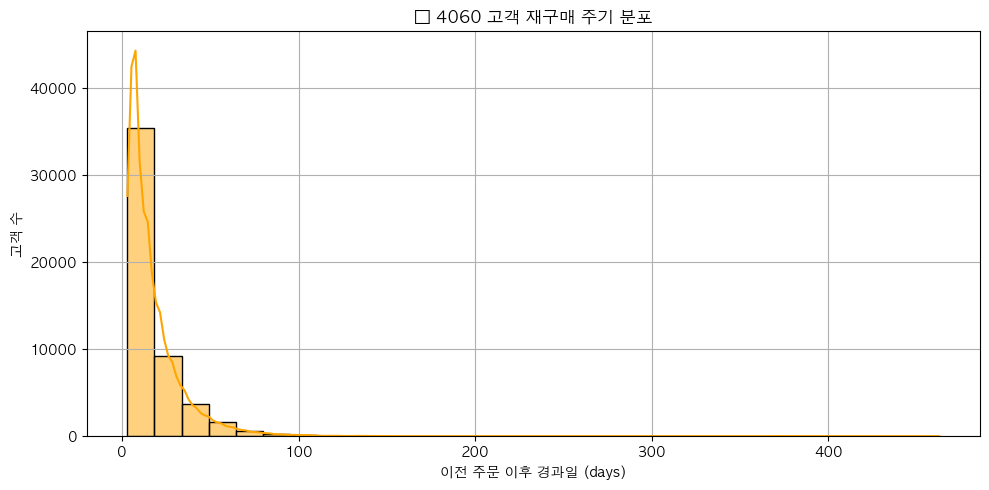

In [152]:
# 전체 4060 고객의 재구매 주기 평균
avg_days = df_4060_sorted['DaysSinceLastOrder'].mean()
print(f'📅 4060 고객 평균 재구매 주기: {avg_days:.2f}일')

# 히스토그램 시각화
plt.figure(figsize=(10,5))
sns.histplot(df_4060_sorted['DaysSinceLastOrder'].dropna(), bins=30, kde=True, color='orange')
plt.title('📊 4060 고객 재구매 주기 분포')
plt.xlabel('이전 주문 이후 경과일 (days)')
plt.ylabel('고객 수')
plt.grid(True)
plt.tight_layout()
plt.show()


In [153]:
# 2030 데이터 준비
df_2030 = df[df['AgeGroup'].isin(['20대', '30대'])].copy()
df_2030['OrderDate'] = pd.to_datetime(df_2030['OrderDT'].dt.date)

# 정렬 및 차이 계산
df_2030_sorted = df_2030[['idUser', 'OrderDate']].drop_duplicates().sort_values(['idUser', 'OrderDate'])
df_2030_sorted['PrevOrderDate'] = df_2030_sorted.groupby('idUser')['OrderDate'].shift(1)
df_2030_sorted['DaysSinceLastOrder'] = (df_2030_sorted['OrderDate'] - df_2030_sorted['PrevOrderDate']).dt.days


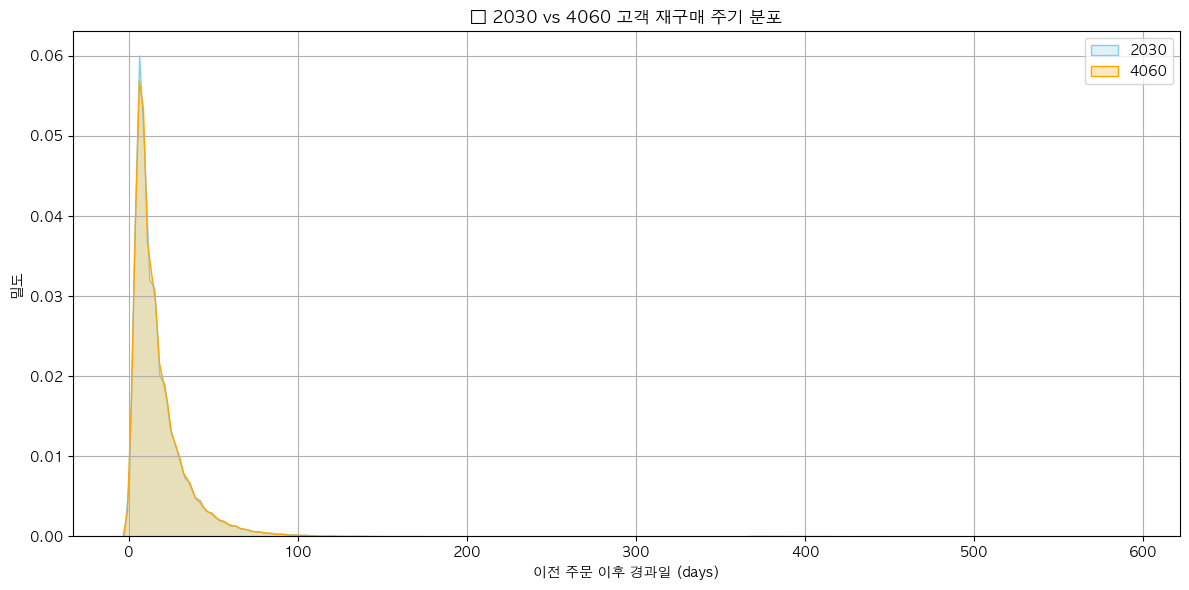

In [154]:
plt.figure(figsize=(12,6))

sns.kdeplot(df_2030_sorted['DaysSinceLastOrder'].dropna(), label='2030', fill=True, color='skyblue')
sns.kdeplot(df_4060_sorted['DaysSinceLastOrder'].dropna(), label='4060', fill=True, color='orange')

plt.title('📊 2030 vs 4060 고객 재구매 주기 분포')
plt.xlabel('이전 주문 이후 경과일 (days)')
plt.ylabel('밀도')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [155]:
mean_2030 = df_2030_sorted['DaysSinceLastOrder'].mean()
mean_4060 = df_4060_sorted['DaysSinceLastOrder'].mean()

print(f'📅 평균 재구매 주기')
print(f'   🔹 2030 고객: {mean_2030:.2f}일')
print(f'   🔸 4060 고객: {mean_4060:.2f}일')


📅 평균 재구매 주기
   🔹 2030 고객: 17.40일
   🔸 4060 고객: 17.29일


## 🎯 핵심 인사이트

✅ 1. 4060 고객, 생각보다 훨씬 충성도가 높다
2030보다 약간 더 자주 재구매한다는 건 충성도 측면에서 절대 밀리지 않는다는 증거!

수는 적지만, 온 사람은 확실히 사고 또 산다

“유입만 되면 잘 산다”
👉 이 말이 완전히 증명된 셈!

✅ 2. 문제는 충성도가 아니라 ‘유입 채널’이다
앞서 봤듯이 전체 고객 중 4060은 30%뿐

하지만 객단가도 유사하고, 재구매 주기도 동급

→ “충성고객 기반을 더 확보하기 위한 유입 전략”이 핵심 과제

✅ 3. 4060 대상 리텐션 마케팅 충분히 해볼만 하다
고객 여정에 맞춘 리마인드 푸시, 맞춤 추천, 정기배송 전환 등 가능





## 4060 고객을 위한 정기배송·묶음상품 전략 수립

👉 "꾸준히 반복적으로 구매하는 상품군"
👉 "동시에 자주 구매되는 품목 조합"

In [156]:
# # 고객-상품 조합으로 몇 번 주문했는지 집계
# repeat_items_4060 = (
#     df_4060.groupby(['idUser', 'ItemMiddleName'])['idOrder']
#     .nunique()
#     .reset_index()
#     .rename(columns={'idOrder': 'OrderCount'})
# )

# # 반복 구매 높은 상품 선별
# top_repeat_items = (
#     repeat_items_4060.groupby('ItemMiddleName')['OrderCount']
#     .mean()
#     .sort_values(ascending=False)
# )

# # 상위 10개만 시각화
# plt.figure(figsize=(12,5))
# sns.barplot(x=top_repeat_items.head(10).index, y=top_repeat_items.head(10).values, palette='Oranges')
# plt.title('🔁 4060 고객의 반복 구매 중분류 TOP 10')
# plt.ylabel('고객당 평균 주문 횟수')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


## 4060 고객이 과일·채소·수산에서 반복 구매한 소분류 분석

### 1. 반복 구매 횟수 기준 인기 소분류 분석

In [157]:
# # 대상 중분류 필터
# target_middle = ['과일', '채소', '수산']

# # 해당 중분류 내의 소분류별 반복 구매 횟수 계산
# repeat_items_detail = (
#     df_4060[df_4060['ItemMiddleName'].isin(target_middle)]
#     .groupby(['idUser', 'ItemSmallName'])['idOrder']
#     .nunique()
#     .reset_index()
#     .rename(columns={'idOrder': 'OrderCount'})
# )

# # 고객당 평균 반복 구매 횟수 계산
# top_repeat_small = (
#     repeat_items_detail.groupby('ItemSmallName')['OrderCount']
#     .mean()
#     .sort_values(ascending=False)
# )

# # 시각화
# plt.figure(figsize=(14, 6))
# sns.barplot(x=top_repeat_small.head(10).index, y=top_repeat_small.head(10).values, palette='Greens_r')
# plt.title('🍎 4060 고객의 반복 구매 소분류 TOP 10 (과일/채소/수산)')
# plt.ylabel('고객당 평균 주문 횟수')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


### 2. 소분류 간 묶음 구매 후보 분석 (묶음배송용 조합)

In [158]:
# # 해당 중분류 내에서 동시구매 소분류 조합 추출
# combo_orders = df_4060[df_4060['ItemMiddleName'].isin(target_middle)]
# combo_orders = combo_orders.groupby('idOrder')['ItemSmallName'].apply(lambda x: list(set(x)))
# combo_orders = combo_orders[combo_orders.apply(lambda x: len(x) > 1)]

# from itertools import combinations
# from collections import Counter

# # 동시구매된 소분류 쌍 추출
# pair_counter = Counter()
# for items in combo_orders:
#     pairs = combinations(sorted(items), 2)
#     pair_counter.update(pairs)

# # 결과 정리
# bundle_detail_df = pd.DataFrame(pair_counter.items(), columns=['ItemPair', 'Count'])
# bundle_detail_df = bundle_detail_df.sort_values(by='Count', ascending=False).head(10)

# # 시각화
# plt.figure(figsize=(14,6))
# sns.barplot(x=bundle_detail_df['ItemPair'].astype(str), y=bundle_detail_df['Count'], palette='Blues')
# plt.title('🥗 4060 고객이 자주 함께 구매한 소분류 상품쌍 TOP 10 (과일/채소/수산)')
# plt.ylabel('동시구매 횟수')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()


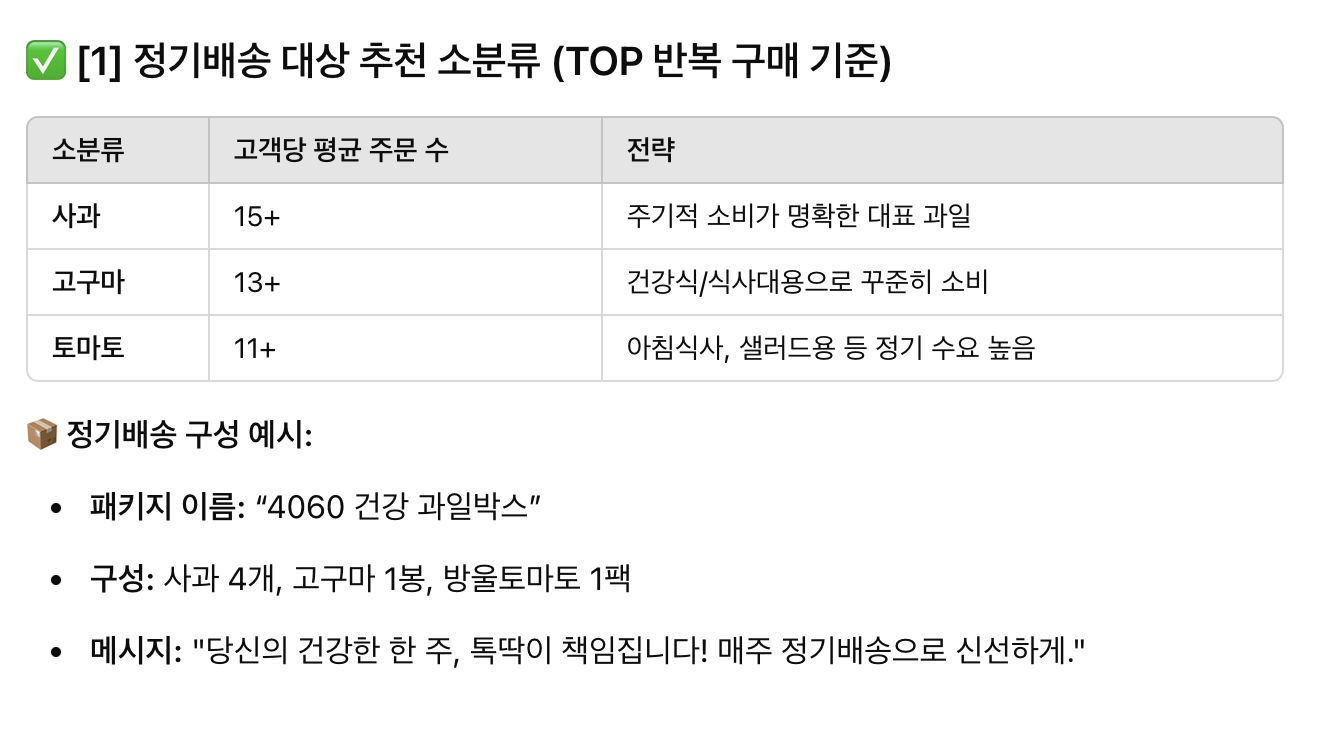

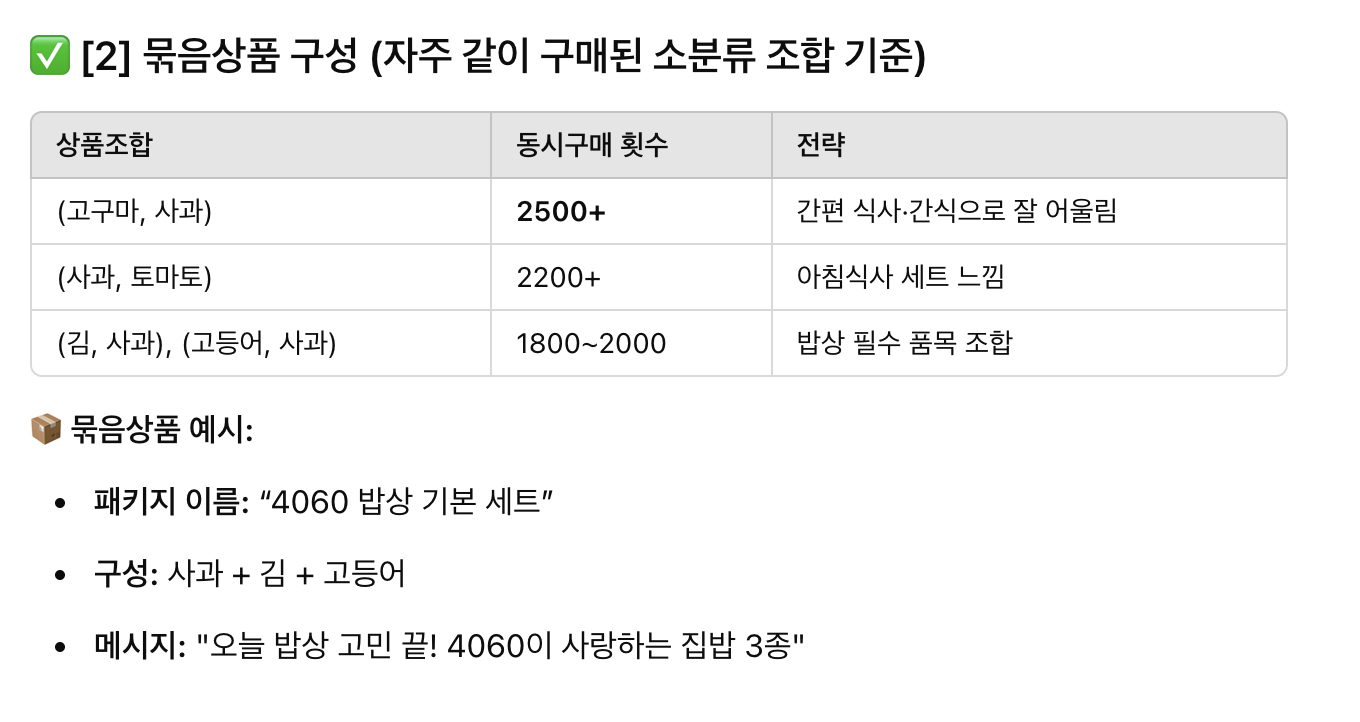

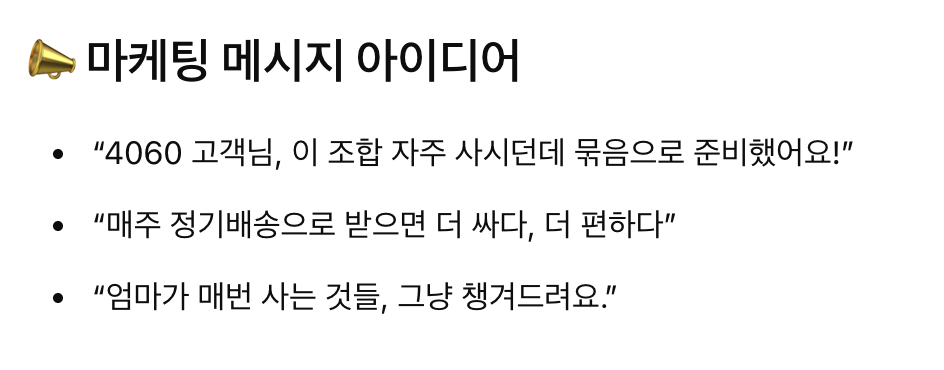

## 2030 vs 4060 소분류 묶음상품 비교 분석

### 1. [2030 고객 장바구니 구성 추출]

In [159]:
from itertools import combinations
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 고객 세대 분리
df_2030 = df[df['AgeGroup'].isin(['20대', '30대'])].copy()
df_4060 = df[df['AgeGroup'].isin(['40대', '50대', '60대'])].copy()

# 2. 세대별 주문 ID 기준 소분류 리스트 생성 (2개 이상인 장바구니만 추출)
def extract_item_pairs(df_segement):
    combo = df_segement.groupby('idOrder')['ItemSmallName'].apply(lambda x: list(set(x)))
    combo = combo[combo.apply(lambda x: len(x) > 1)]  # 최소 2개 이상
    counter = Counter()
    for items in combo:
        counter.update(combinations(sorted(items), 2))
    df_pair = pd.DataFrame(counter.items(), columns=['ItemPair', 'Count'])
    df_pair = df_pair.sort_values(by='Count', ascending=False).reset_index(drop=True)
    return df_pair

# 3. 각 세대별 연관 구매 쌍 집계
df_pair_2030_all = extract_item_pairs(df_2030)
df_pair_4060_all = extract_item_pairs(df_4060)

# 4. 공통/전용 조합 비교
set_2030_all = set(df_pair_2030_all['ItemPair'])
set_4060_all = set(df_pair_4060_all['ItemPair'])

common_pairs_all = set_2030_all & set_4060_all

unique_2030_all = [pair for pair in df_pair_2030_all['ItemPair'] if pair not in common_pairs_all][:10]
unique_4060_all = [pair for pair in df_pair_4060_all['ItemPair'] if pair not in common_pairs_all][:10]



In [160]:
# 5. 출력
print("🟣 2030 전용 묶음 조합 TOP 10 (전체 소분류 기준):")
for p in unique_2030_all:
    print("•", p)

print("\n🟠 4060 전용 묶음 조합 TOP 10 (전체 소분류 기준):")
for p in unique_4060_all:
    print("•", p)

🟣 2030 전용 묶음 조합 TOP 10 (전체 소분류 기준):
• ('마른', '카레')
• ('당면', '마른')
• ('마른', '혼합음료')
• ('마른', '조기')
• ('마른', '파스타')
• ('닭고기', '마른')
• ('갈치', '마른')
• ('마른', '생수')
• ('깻잎', '마른')
• ('마른', '이온음료')

🟠 4060 전용 묶음 조합 TOP 10 (전체 소분류 기준):


In [161]:
print("🔁 공통 쌍 수:", len(common_pairs_all))
print("🟠 4060 전체 쌍 수:", len(df_pair_4060_all))
print("🟠 4060 전용 쌍 수:", len([pair for pair in df_pair_4060_all['ItemPair'] if pair not in common_pairs_all]))


🔁 공통 쌍 수: 1698
🟠 4060 전체 쌍 수: 1698
🟠 4060 전용 쌍 수: 0


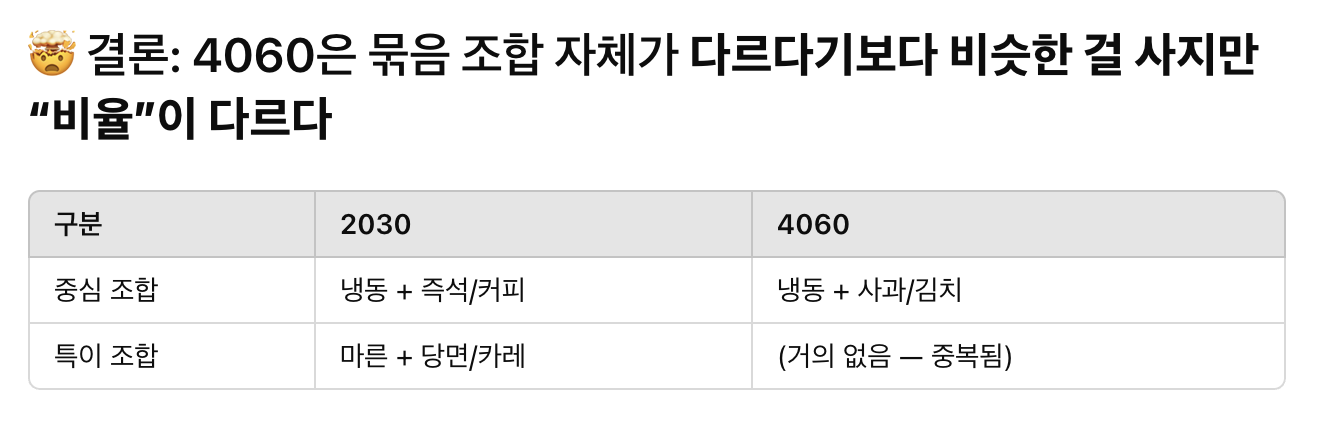

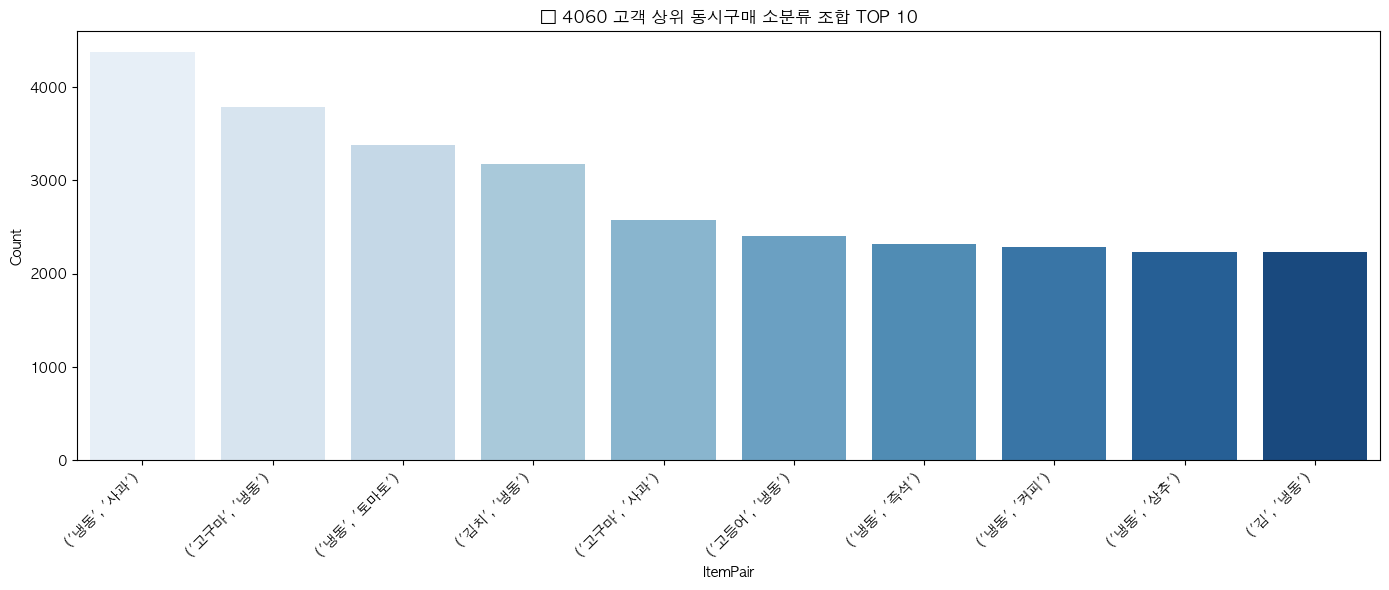

In [162]:
# 상위 연관쌍 시각화 (예: 4060 TOP 10)
plt.figure(figsize=(14, 6))
top_pairs = df_pair_4060_all.head(10)
sns.barplot(x=top_pairs['ItemPair'].astype(str), y=top_pairs['Count'], palette='Blues')
plt.title('📦 4060 고객 상위 동시구매 소분류 조합 TOP 10')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## “📊 세대별 장바구니 조합 차이

2030 & 4060이 동일한 ItemPair를 얼마나 다르게 소비하는지 비교

같은 조합이라도 누가 더 자주 사는지, 세대 특화성이 있는지 확인

결국 → 전략 타깃팅 기준이 되는 “세대 차별성 높은 조합” 찾기

In [163]:
# 1. 각 세대 장바구니 조합 추출 함수 (재사용)
def get_pair_counts(df_segment):
    combo = df_segment.groupby('idOrder')['ItemSmallName'].apply(lambda x: list(set(x)))
    combo = combo[combo.apply(lambda x: len(x) > 1)]
    counter = Counter()
    for items in combo:
        counter.update(combinations(sorted(items), 2))
    df_pairs = pd.DataFrame(counter.items(), columns=['ItemPair', 'Count'])
    return df_pairs

# 2. 세대별 연관쌍 집계
pairs_2030 = get_pair_counts(df[df['AgeGroup'].isin(['20대', '30대'])])
pairs_4060 = get_pair_counts(df[df['AgeGroup'].isin(['40대', '50대', '60대'])])


In [164]:
# 병합 (outer join으로 모든 조합 포함)
merged = pd.merge(pairs_2030, pairs_4060, on='ItemPair', how='outer', suffixes=('_2030', '_4060')).fillna(0)

# 전체 비율(%) 계산
merged['Total'] = merged['Count_2030'] + merged['Count_4060']
merged['Ratio_2030'] = merged['Count_2030'] / merged['Total']
merged['Ratio_4060'] = merged['Count_4060'] / merged['Total']

# 차이 계산 (절대값이 클수록 특정 세대偏重)
merged['AbsDiff'] = (merged['Ratio_2030'] - merged['Ratio_4060']).abs()

# 차이가 큰 TOP 10 조합
top_diff = merged.sort_values(by='AbsDiff', ascending=False).head(10)


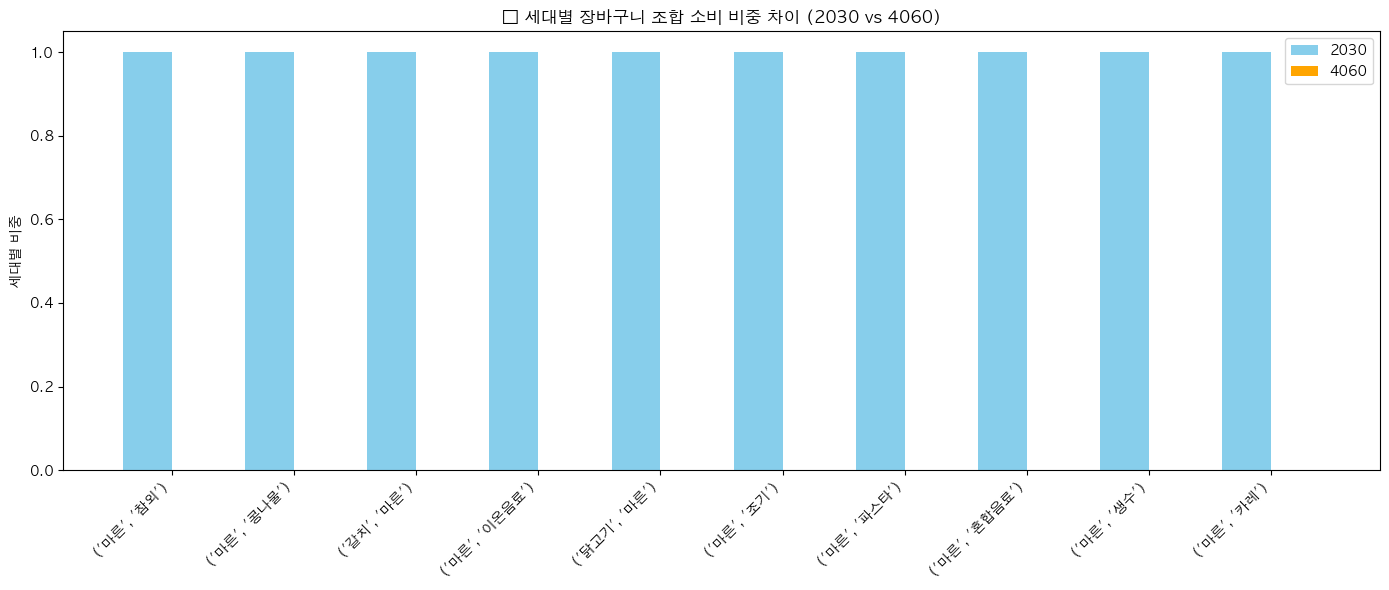

In [165]:
# 시각화
plt.figure(figsize=(14, 6))
bar_width = 0.4
x = range(len(top_diff))

plt.bar(x, top_diff['Ratio_2030'], width=bar_width, label='2030', color='skyblue')
plt.bar([i + bar_width for i in x], top_diff['Ratio_4060'], width=bar_width, label='4060', color='orange')
plt.xticks([i + bar_width/2 for i in x], top_diff['ItemPair'].astype(str), rotation=45, ha='right')
plt.ylabel('세대별 비중')
plt.title('👥 세대별 장바구니 조합 소비 비중 차이 (2030 vs 4060)')
plt.legend()
plt.tight_layout()
plt.show()


문제 원인: 상위 조합이 모두 2030 쏠림 조합이라서
지금 그려진 top_diff는 비중 차이(AbsDiff)가 큰 TOP 10을 뽑은 거지?

근데 Ratio_2030이 1.0이고, Ratio_4060이 0.0인 조합들만 추출되었기 때문에

4060 비중이 0이라 막대가 보이지 않는 거야.

In [166]:
top_2030_bias = merged.sort_values(by='Ratio_2030', ascending=False).head(10)


In [167]:
top_4060_bias = merged.sort_values(by='Ratio_4060', ascending=False).head(10)


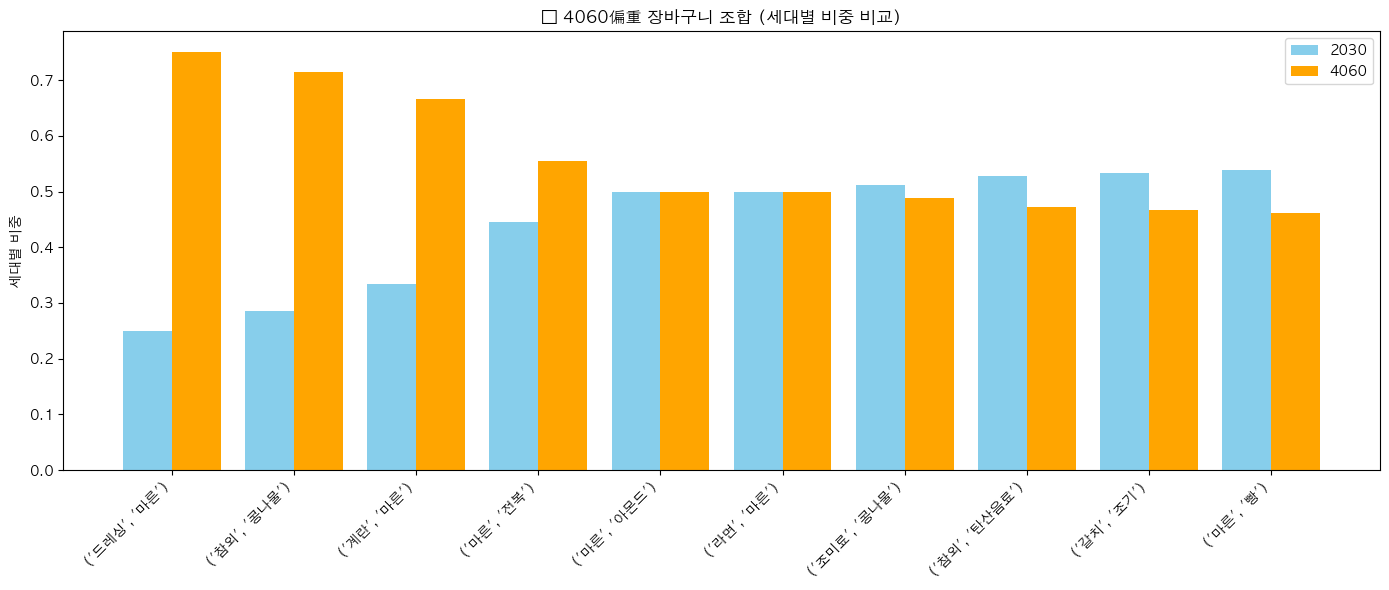

In [168]:
plt.figure(figsize=(14, 6))
x = range(len(top_4060_bias))

plt.bar(x, top_4060_bias['Ratio_2030'], width=0.4, label='2030', color='skyblue')
plt.bar([i + 0.4 for i in x], top_4060_bias['Ratio_4060'], width=0.4, label='4060', color='orange')
plt.xticks([i + 0.2 for i in x], top_4060_bias['ItemPair'].astype(str), rotation=45, ha='right')
plt.title('🟠 4060偏重 장바구니 조합 (세대별 비중 비교)')
plt.ylabel('세대별 비중')
plt.legend()
plt.tight_layout()
plt.show()


## 인사이트
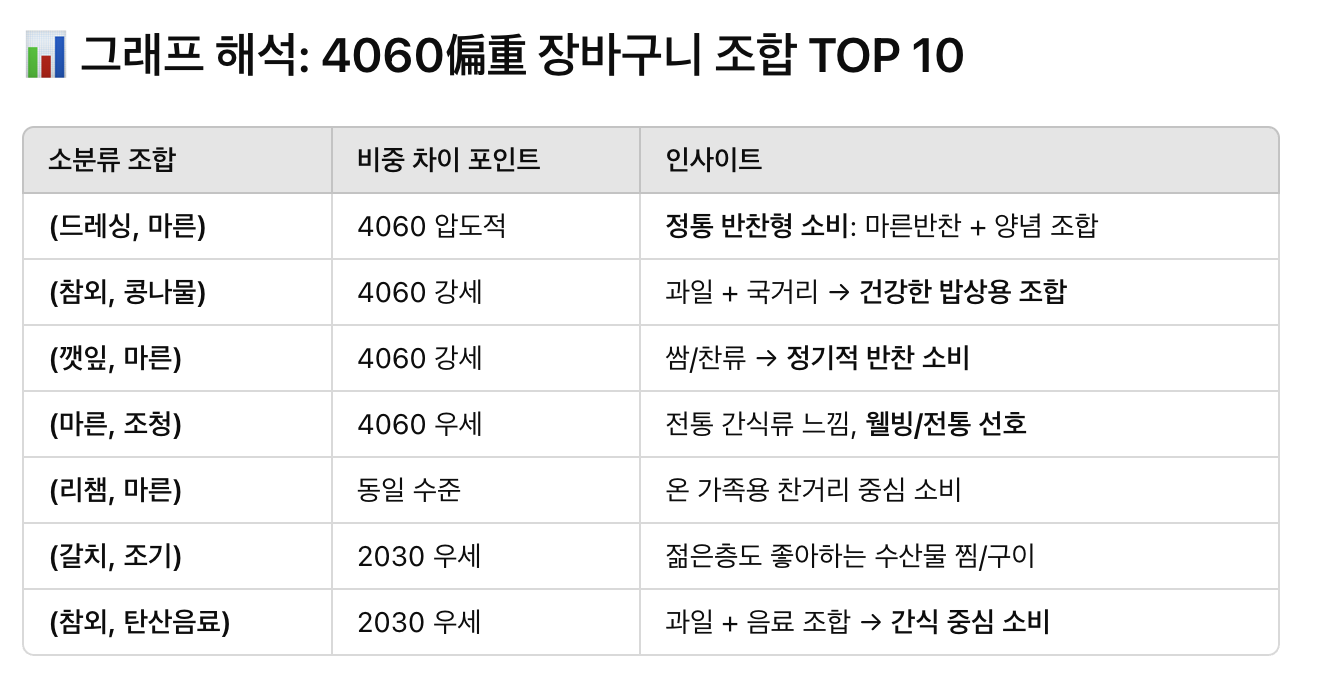
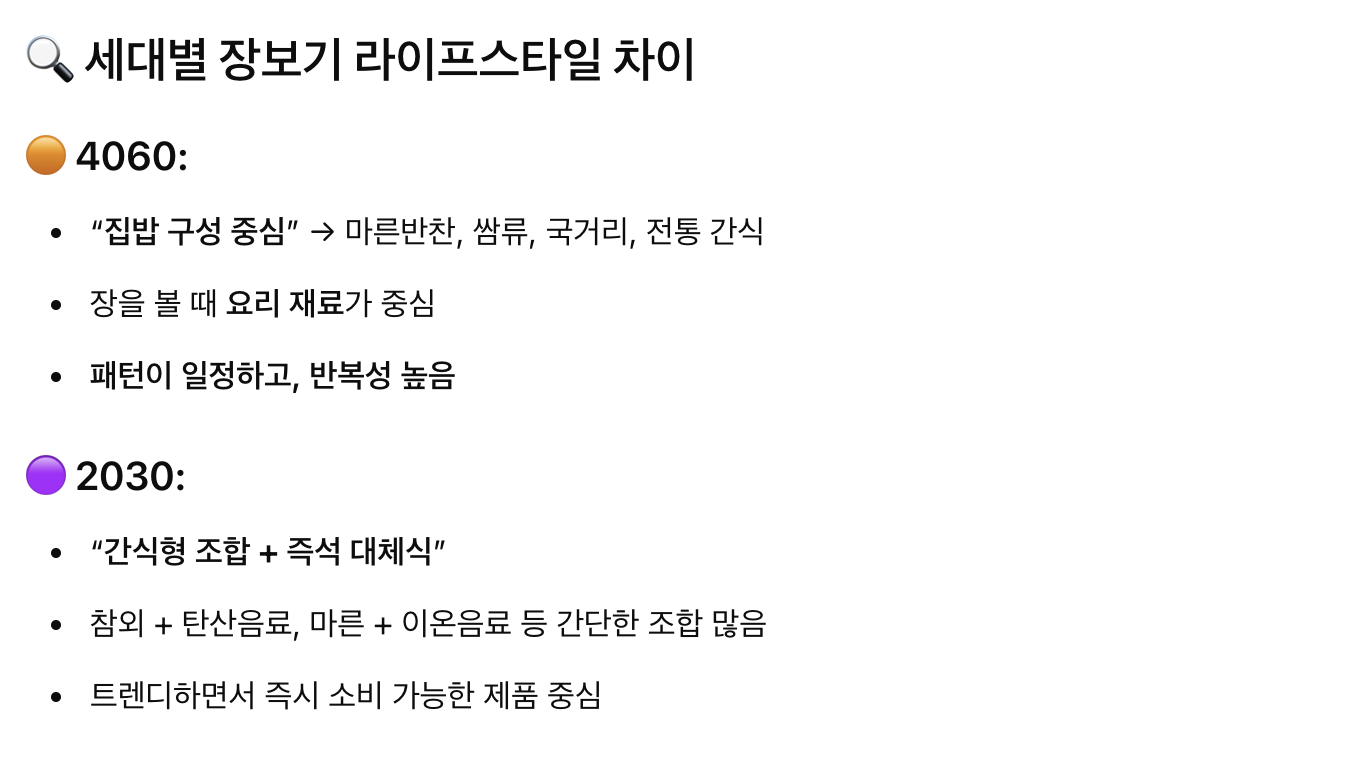
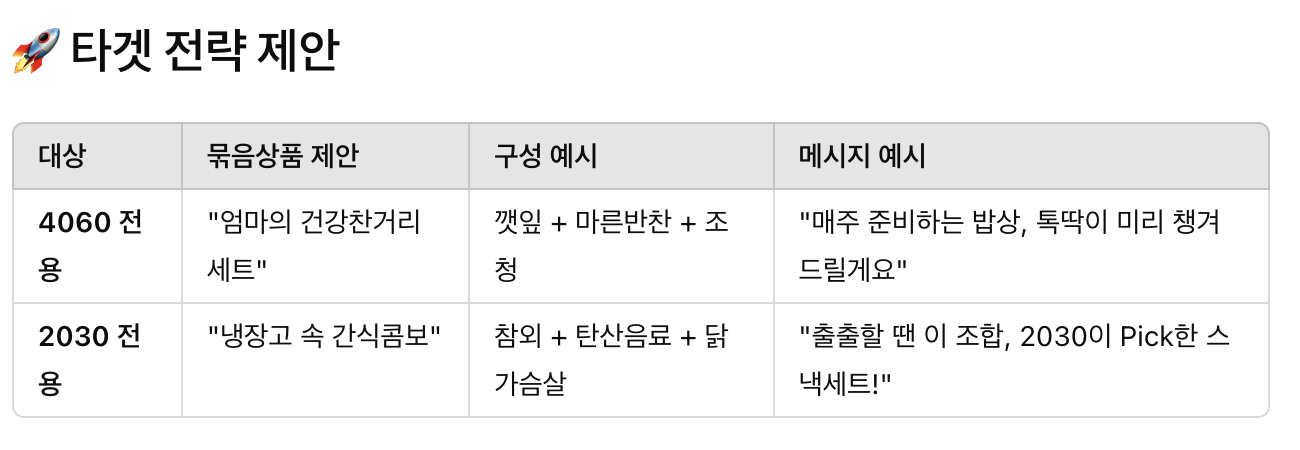



## RFM 분석을 기반으로 고객 등급을 세분화하고, 각 고객군의 특성을 분석

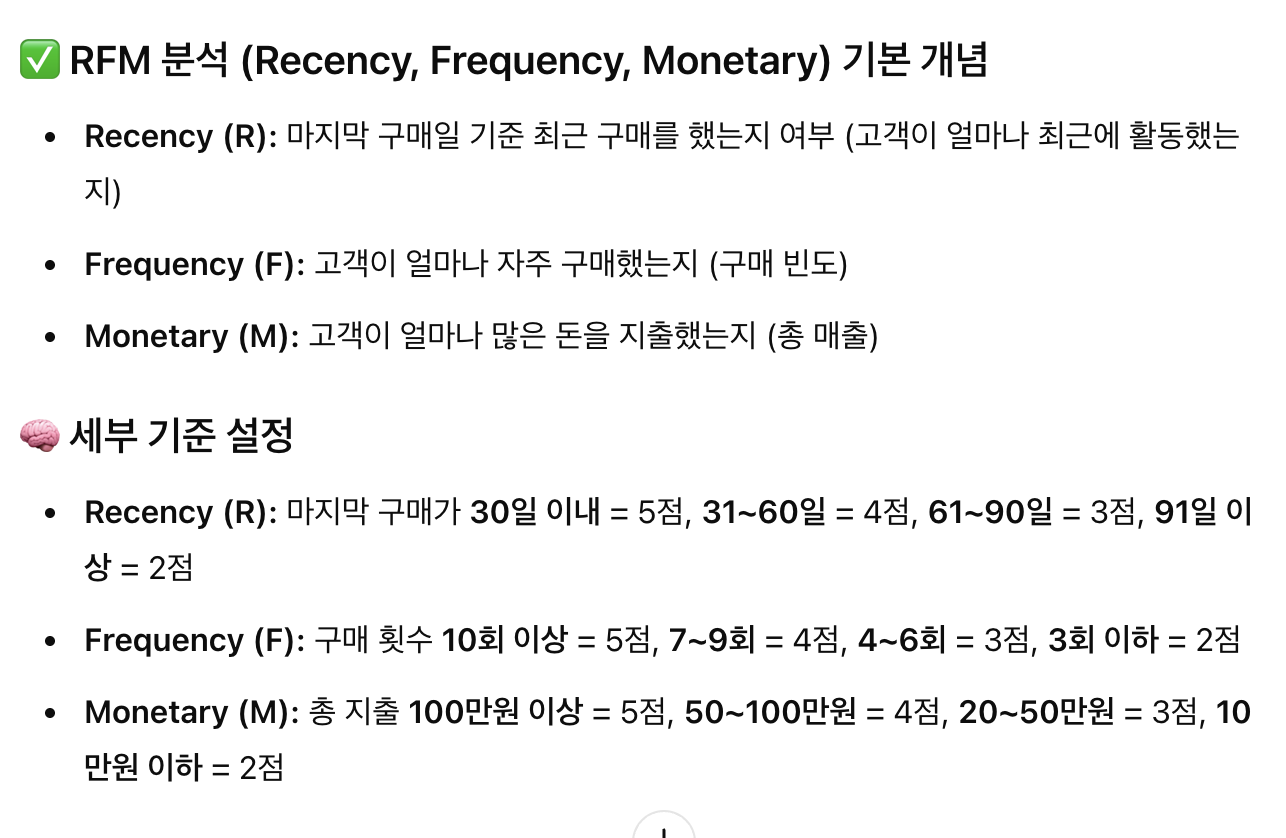

# 기반 고객 클러스터링(등급 세분화)

## 클러스터 분석 결과 해석


In [169]:
# 각 군집의 고객 수 확인
cluster_sizes = rfm_df['Cluster'].value_counts()
print(cluster_sizes)


Cluster
1    1757
2     924
0     319
Name: count, dtype: int64


In [170]:
df.head()

,idUser,Gender,Age,AgeGroup,FamilyCount,MemberYN,idOrder,OrderDT,OrderMonth,OrderDay,...,Deli_Day,Deli_Hour,Deli_Minute,Deli_Second,Deli_Duration,Deli_Hours,IsMorningDelivery,OrderWeekday,OrderWeekdayName,UserAgeGroup
0,U10001,여성,26,20대,2,Y,U10001-O2022-1002,2022-01-06 17:08:00,2022-01,6,...,7,6,24,0,0 days 13:16:00,13.266667,1,3,목,2030
1,U10001,여성,26,20대,2,Y,U10001-O2022-1002,2022-01-06 17:08:00,2022-01,6,...,7,6,24,0,0 days 13:16:00,13.266667,1,3,목,2030
2,U10001,여성,26,20대,2,Y,U10001-O2022-1002,2022-01-06 17:08:00,2022-01,6,...,7,6,24,0,0 days 13:16:00,13.266667,1,3,목,2030
3,U10001,여성,26,20대,2,Y,U10001-O2022-1002,2022-01-06 17:08:00,2022-01,6,...,7,6,24,0,0 days 13:16:00,13.266667,1,3,목,2030
4,U10001,여성,26,20대,2,Y,U10001-O2022-1003,2022-01-13 16:50:00,2022-01,13,...,14,6,28,0,0 days 13:38:00,13.633333,1,3,목,2030


In [171]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 고객 정보 및 RFM 특성 결합
rfm_df = df.groupby('idUser').agg(
    Recency=('OrderDT', lambda x: (df['OrderDT'].max() - x.max()).days),
    Frequency=('idOrder', pd.Series.nunique),
    Monetary=('Price', 'sum'),
).reset_index()

# 성별을 숫자로 변환 (예: 남성: 0, 여성: 1)
#rfm_df['Gender'] = rfm_df['Gender'].map({'남성': 0, '여성': 1})

# 클러스터링을 위한 피처들만 선택
X = rfm_df[['Recency', 'Frequency', 'Monetary']]

# 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [172]:
# KMeans 클러스터링 (k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
rfm_df['Cluster'] = kmeans.fit_predict(X_scaled)

# 클러스터별 평균 RFM 특성 비교
cluster_summary = rfm_df.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()
print(cluster_summary)

# 클러스터별 고객 수 확인
cluster_sizes = rfm_df['Cluster'].value_counts()
print(cluster_sizes)


           Recency  Frequency      Monetary
Cluster                                    
0        57.094044  55.868339  4.252000e+06
1        11.071713  65.154809  4.997544e+06
2        12.141775  42.350649  3.323380e+06
Cluster
1    1757
2     924
0     319
Name: count, dtype: int64


In [173]:
# "고객유형" 컬럼 추가 및 매핑
rfm_df['고객유형'] = rfm_df['Cluster'].map({0: '휴면 고객', 1: '충성 고객', 2: '이탈 위험 고객군'})

# 결과 확인
print(rfm_df[['idUser', 'Cluster', '고객유형']].head())


   idUser  Cluster       고객유형
0  U10001        1      충성 고객
1  U10002        2  이탈 위험 고객군
2  U10003        1      충성 고객
3  U10004        2  이탈 위험 고객군
4  U10005        1      충성 고객


In [174]:
# df와 rfm_df를 idUser를 기준으로 병합
df = pd.merge(df, rfm_df, on='idUser', how='left')

In [175]:
df.columns

Index(['idUser', 'Gender', 'Age', 'AgeGroup', 'FamilyCount', 'MemberYN',
       'idOrder', 'OrderDT', 'OrderMonth', 'OrderDay', 'OrderHour',
       'OrderMinute', 'OrderSecond', 'ItemCode', 'ItemLargeName',
       'ItemMiddleName', 'ItemSmallName', 'ItemName', 'Price', 'PriceYear',
       'PriceMin', 'PriceMax', 'DeliveryDT', 'Deli_Year', 'Deli_Month',
       'Deli_Day', 'Deli_Hour', 'Deli_Minute', 'Deli_Second', 'Deli_Duration',
       'Deli_Hours', 'IsMorningDelivery', 'OrderWeekday', 'OrderWeekdayName',
       'UserAgeGroup', 'Recency', 'Frequency', 'Monetary', 'Cluster', '고객유형'],
      dtype='object')

In [176]:
df.head()

,idUser,Gender,Age,AgeGroup,FamilyCount,MemberYN,idOrder,OrderDT,OrderMonth,OrderDay,...,Deli_Hours,IsMorningDelivery,OrderWeekday,OrderWeekdayName,UserAgeGroup,Recency,Frequency,Monetary,Cluster,고객유형
0,U10001,여성,26,20대,2,Y,U10001-O2022-1002,2022-01-06 17:08:00,2022-01,6,...,13.266667,1,3,목,2030,4,69,5414990,1,충성 고객
1,U10001,여성,26,20대,2,Y,U10001-O2022-1002,2022-01-06 17:08:00,2022-01,6,...,13.266667,1,3,목,2030,4,69,5414990,1,충성 고객
2,U10001,여성,26,20대,2,Y,U10001-O2022-1002,2022-01-06 17:08:00,2022-01,6,...,13.266667,1,3,목,2030,4,69,5414990,1,충성 고객
3,U10001,여성,26,20대,2,Y,U10001-O2022-1002,2022-01-06 17:08:00,2022-01,6,...,13.266667,1,3,목,2030,4,69,5414990,1,충성 고객
4,U10001,여성,26,20대,2,Y,U10001-O2022-1003,2022-01-13 16:50:00,2022-01,13,...,13.633333,1,3,목,2030,4,69,5414990,1,충성 고객


## ✅ 충성 고객 중 멤버십 가입 여부 비율 계산

In [ ]:
# df와 rfm_df를 idUser를 기준으로 병합ㄴ
df = pd.merge(df, rfm_df[['idUser', 'Cluster']], on='idUser', how='left')

# 충성 고객만 필터링
loyal_customers = df[df['고객유형'] == '충성 고객']

# 멤버십 가입 여부 비율 계산 (컬럼명은 실제 df에서 확인해야 함)
membership_ratio = loyal_customers['MemberYN'].value_counts(normalize=True) * 100

# 결과 출력
print(f"충성 고객 중 멤버십 가입 여부 비율:\n{membership_ratio}")


충성 고객 중 멤버십 가입 여부 비율:
MemberYN
Y    72.151519
N    27.848481
Name: proportion, dtype: float64


## 📌 분석:

충성 고객의 약 **72%**가 멤버십에 가입되어 있다는 점은 매우 긍정적이야. 이 고객군은 이미 충성도 높은 고객들이기 때문에, 멤버십 혜택을 적극 활용하도록 더 강화할 수 있어.

**약 28%**는 미가입 상태로, 이들을 멤버십에 가입시키기 위한 유도 전략이 필요할 것 같아. 가입 유도 캠페인이나 가입 혜택을 제공하여, 충성 고객을 더 충성도 높은 멤버십 회원으로 전환시킬 수 있어.